In [1]:
import uproot
import awkward as ak
import numpy as np

In [2]:
f = uproot.open("root://eoscms.cern.ch////eos/cms/store/group/phys_higgs/HLepRare/HTT_skim_v1/Run2_2017/SingleElectron_Run2017B/nanoHTT_0.root")["Events"]

In [3]:
ar = f.arrays(filter_name=["TrigObj*", "HLT_Ele*PFTau*", "HLT_Ele32_WPTight_Gsf*"])

In [21]:
ak.count_nonzero((~ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1) & (ar.HLT_Ele24_eta2p1_WPTight_Gsf_MediumChargedIsoPFTau30_eta2p1_CrossL1))/ak.count_nonzero(ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1)

3.0284370236520932e-05

In [11]:
art = ar[ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1]
art

<Array [{...}, {...}, {...}, ..., {...}, {...}] type='297183 * {HLT_Ele24_e...'>

In [12]:
trigobj_ele = ak.zip({"pt":art.TrigObj_pt[art.TrigObj_id==11], "filterBits":art.TrigObj_filterBits[art.TrigObj_id==11]})
trigobj_tau = ak.zip({"pt":art.TrigObj_pt[art.TrigObj_id==15], "filterBits":art.TrigObj_filterBits[art.TrigObj_id==15]})

In [13]:
ak.count_nonzero(ak.any((trigobj_ele.filterBits & 64) > 0, axis=-1))/len(trigobj_ele)

0.9637092296665691

In [14]:
ak.count_nonzero(ak.any((trigobj_tau.filterBits & 256) > 0, axis=-1))/len(trigobj_tau), ak.count_nonzero(ak.any(((trigobj_tau.filterBits & 256) > 0)&((trigobj_tau.filterBits & 1) > 0), axis=-1))/len(trigobj_tau)

(1.0, 1.0)

In [35]:
((trigobj_tau.filterBits & 256) > 0)&((trigobj_tau.filterBits & 1)>0)

<Array [[False, True], [...], ..., [True, True]] type='297183 * var * bool'>

In [30]:
trigobj_tau

<Array [[{pt: 98.8, ...}, {...}], ..., [...]] type='297183 * var * {pt: flo...'>

In [15]:
good_bits = ak.any((trigobj_ele.filterBits & 64) > 0, axis=-1) & ak.any(((trigobj_tau.filterBits & 256) > 0)&((trigobj_tau.filterBits & 1)>0), axis=-1)
ak.count_nonzero(good_bits)/len(good_bits)

0.9637092296665691

In [39]:
arg = ar[good_bits]

In [46]:
central_eles = (np.abs(arg.TrigObj_eta) < 0.5) & (arg.TrigObj_id == 11)
arg[["TrigObj_id", "TrigObj_eta", "TrigObj_phi"]][central_eles]

<Array [{TrigObj_id: [], ...}, ..., {...}] type='286398 * {TrigObj_id: var ...'>

In [54]:
f_dy = uproot.open("root://eos.grif.fr///eos/grif/cms/llr/store/user/tcuisset/boostedTaus/2018_MC/DYJetsToLL_M-50-amcatnloFXFX/nano_0.root")["Events"]
ar_dy = f_dy.arrays(filter_name=["Electron_eta", "Electron_deltaEta*", "Electron_dxy", "Electron_dz", "Electron_pt"])

In [53]:
np.max(np.abs(ak.flatten(ar_dy.Electron_deltaEtaSC)))

4.6054688

In [55]:
good_eles = (ar_dy.Electron_pt>20)&(ar_dy.Electron_dxy<=0.045) & (ar_dy.Electron_dz<=0.2)

In [57]:
ak.flatten(ar_dy.Electron_deltaEtaSC[good_eles])

<Array [-0.00858, 0.0104, ..., 0.00499, 0.011] type='1692669 * float32'>

# scale & smearing test

In [2]:
ar = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/MergeCategorization/bul_2018_ZZ_v12/dy_2j/cat_crossTrigger_debug/prod_250225_dR02/data_0.root")["Events"].arrays(filter_name=["Electron_pt*", "Electron_mass*", "Electron_eta"])

In [9]:
ak.flatten(ar.Electron_pt_scale_up/ar.Electron_pt)

<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='32969 * float32'>

In [28]:
# /grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/zz_sl_signal/cat_base_selection/prod_250225_dR02/data_0.root
# /grid_mnt/data__data.polcms/cms/cuisset/cmt/MergeCategorization/bul_2018_ZZ_v12/dy/cat_ZZ_EC90_resolved_1b_HPSTau/prod_250225_dR02/data_0.root
ar = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/zz_sl_signal/cat_base_selection/prod_250225_dR02/data_0.root")["Events"].arrays(filter_name=["Electron_*", "dau*", "pairType*", "isBoostedTau"])
ar = ar[(ar.pairType == 1) & (~(ar.isBoostedTau))]

In [16]:
ar

<Array [{Electron_cutBased: [...], ...}, ...] type='10230 * {Electron_cutBa...'>

In [18]:
ar.dau1_index

<Array [1, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='10230 * int32'>

In [30]:
dau1_genmatch = ak.flatten(ar.Electron_genPartFlav[ak.singletons(ar.dau1_index)], axis=-1)
dau1_genmatch

<Array [15, 15, 15, 15, 15, 15, ..., 15, 15, 15, 15, 15] type='1606 * uint8'>

In [34]:
ak.count_nonzero(ar.dau2_idDeepTau2017v2p1VSe>=6)/len(ar)

0.772104607721046

(array([ 12.,  55.,   0.,  98.,   0., 201., 224.,   0., 203., 813.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

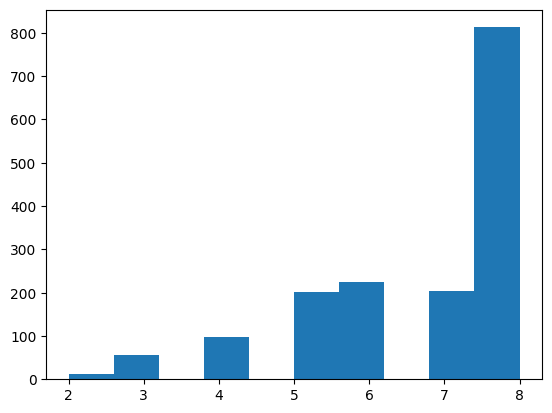

In [33]:
import matplotlib.pyplot as plt
plt.hist(ar.dau2_idDeepTau2017v2p1VSe)#[dau1_genmatch==1]

In [29]:
dau2_genmatch = ak.flatten(ar.Tau_genPartFlav[ak.singletons(ar.dau2_index)], axis=-1)
dau2_genmatch

AttributeError: no field named 'Tau_genPartFlav'

## checking hlt path vs run nb

In [54]:
"/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_a/cat_base_selection/prod_250225_fixFilterBits"
def check(f_path):
    with uproot.open(f_path) as f:
        ar = f["Events"].arrays(filter_name=["HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1", "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1", "run"])
        if ak.all(ar.run < 317509) and "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1" in ar.fields and "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1" not in ar.fields:
            return True
        if ak.all(ar.run >= 317509) and "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1" not in ar.fields and "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1" in ar.fields:
            return True
        return False

In [57]:
import os
base = "/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits"
for f_path in os.listdir(base):
    if not check(base+"/"+f_path):
        print(base+"/"+f_path)

/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_35.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_30.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_18.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_21.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_22.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_14.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/data_etau_b/cat_base_selection/prod_250225_fixFilterBits/data_

KeyboardInterrupt: 

In [67]:
ar = uproot.concatenate([base + "/" + n + ":Events" for n in os.listdir(base)], filter_name=["HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1", "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1", "run"])

In [ ]:
ak.count_nonzero((ar.run>= 317509) & (ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1))/ak.count_nonzero(ar.run>= 317509), ak.count_nonzero((ar.run< 317509) & (ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1))/ak.count_nonzero(ar.run< 317509)

(0.2063944176543413, 0.24361933973686334)

In [70]:
ak.count_nonzero((ar.run< 317509) & (ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1))/ak.count_nonzero(ar.run< 317509), ak.count_nonzero((ar.run>=317509) & (ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1))/ak.count_nonzero(ar.run>= 317509)

(0.0, 0.0)

(array([281.,   5., 223.,  25.,   0.,   0.,   0.,   0.,   0.,  67.]),
 array([317182. , 317351.5, 317521. , 317690.5, 317860. , 318029.5,
        318199. , 318368.5, 318538. , 318707.5, 318877. ]),
 <BarContainer object of 10 artists>)

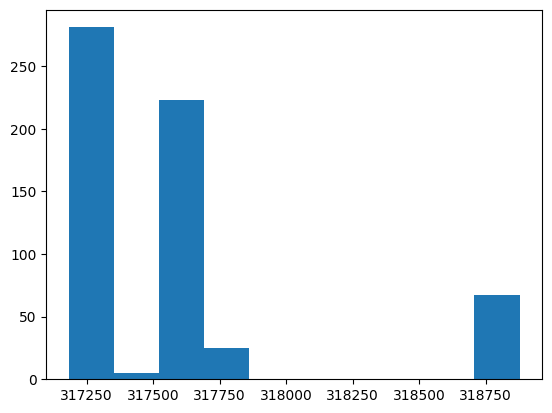

In [61]:
import matplotlib.pyplot as plt
plt.hist(ar.run)

## checking input nano data

In [80]:
ar = uproot.concatenate([f"root://eos.grif.fr///eos/grif/cms/llr/store/user/tcuisset/boostedTaus/2018_data/EGamma_Run2018B/nano_{i}.root" +":Events" for i in range(1)],
    filter_name=["HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1", "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1", "run", "TrigObj*"],
    how="zip")


In [81]:
arf = ar[ar.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1]
ak.sort(arf.run)

<Array [317510, 317510, 317510, ..., 318874, 318874] type='25972 * uint32'>

In [84]:
arf.TrigObj[0][2]

<Record {l1charge: 0, id: 11, l1iso: 3, ...} type='{l1charge: int16, id: ui...'>

In [88]:
statusFlags_doc = {11:{0 : "CaloIdL_TrackIdL_IsoVL", 1 : "1e (WPTight)", 2 : "1e (WPLoose)", 3 : "OverlapFilter PFTau", 4 : "2e", 5 : "1e-1mu", 6 : "1e-1tau", 7 : "3e", 8 : "2e-1mu", 9 : "1e-2mu", 10 : "1e (32_L1DoubleEG_AND_L1SingleEGOr)", 11 : "1e (CaloIdVT_GsfTrkIdT)", 12 : "1e (PFJet)", 13 : "1e (Photon175_OR_Photon200)"}}
def readTrigObj(obj):
    s = ""
    doc = statusFlags_doc[obj.id]
    for bitn in doc.keys():
        is_bit_set = (obj.filterBits & (1 << bitn)) != 0
        if is_bit_set:
            s += str(bitn)+"="+doc[bitn] + ", "
    return s

In [89]:
readTrigObj(arf.TrigObj[0][2])

'0=CaloIdL_TrackIdL_IsoVL, 1=1e (WPTight), 3=OverlapFilter PFTau, 4=2e, 6=1e-1tau, 10=1e (32_L1DoubleEG_AND_L1SingleEGOr), 12=1e (PFJet), '

In [116]:
ak.count_nonzero((ar.TrigObj.id == 11) & ((ar.TrigObj.filterBits & (1<<3)) == 0) & ((ar.TrigObj.filterBits & (1<<6)) != 0))

0

In [109]:
readTrigObj(arf2[0].TrigObj[0])

'0=CaloIdL_TrackIdL_IsoVL, 1=1e (WPTight), 3=OverlapFilter PFTau, 4=2e, 6=1e-1tau, 7=3e, 10=1e (32_L1DoubleEG_AND_L1SingleEGOr), 11=1e (CaloIdVT_GsfTrkIdT), 12=1e (PFJet), '

In [134]:
f_dy = uproot.open("root://eos.grif.fr///eos/grif/cms/llr/store/user/tcuisset/boostedTaus/2018_MC/DYJetsToLL_M-50-amcatnloFXFX/nano_1.root")["Events"].arrays(filter_name=["HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1", "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1", "HLT_Ele32_WPTight_Gsf", "run", "TrigObj*"],
    how="zip", entry_stop=1000000)

In [126]:
ak.count_nonzero((f_dy.TrigObj.id == 11) & ((f_dy.TrigObj.filterBits & (1<<3)) != 0) & ((f_dy.TrigObj.filterBits & (1<<6)) != 0))

9409

In [135]:
arf = f_dy[f_dy.HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1 & ~f_dy.HLT_Ele32_WPTight_Gsf]
arf

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='5994 * {run: uint32, HLT_E...'>

In [139]:
arf[1].TrigObj[["id", "pt", "eta", "l1pt"]]

<Array [{id: 11, pt: 29.3, eta: ..., ...}, ...] type='4 * {id: uint16, pt: ...'>

In [143]:
readTrigObj(arf.TrigObj[1][0])

'0=CaloIdL_TrackIdL_IsoVL, 1=1e (WPTight), 2=1e (WPLoose), 3=OverlapFilter PFTau, 4=2e, 6=1e-1tau, 12=1e (PFJet), '